In [1]:

import pdb
import numpy as np

import json
import os
import re
import csv

def extract_numeric_part(s):
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    return float('inf')

def find_indices(list_to_check, item_to_find):
    array = np.array(list_to_check)
    indices = np.where(array == item_to_find)[0]
    return list(indices)

csv_path = '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/dimple'
dimple_pth='/dls/i23/data/2024/nr29467-33/processing/tomography/dimple/proteinasek'
anacor_path = '/dls/i23/data/2024/nr29467-33/processing/tomography/anacor/proteinase_k'
prefix='auto'
data_list=[]
for dir_pth in os.listdir(anacor_path):
    if os.path.isdir(os.path.join(dimple_pth, dir_pth)) is False:
        continue
    
    data_list.append(dir_pth)

sorted_data_list = sorted(data_list)

dataset_list= sorted_data_list
#single_num=len(sorted_data_list)
single_num=len(data_list)
print(dataset_list)

#for crystal in crystals:
for dir_pth in (dataset_list):
    final_result=[['set_id', 'method', 'SG_A:CYS123', 'SG_A:CYS73', 'SD_A:MET225', 'SG_A:CYS178', 'SD_A:MET55', 'SG_A:CYS249', 'SD_A:MET111']]
    counter=0
    atoms_to_find = final_result[0][2:]

    for target in ['acsh','sh', 'ac']:
        
        i = dataset_list.index(dir_pth)
        try:
            if i < single_num:
                with open(os.path.join(dimple_pth, dir_pth, target, 'anode.lsa'), 'r') as file:
                    lines = file.readlines()

        except:
            continue
            
        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '          X        Y        Z   Height(sig)  SOF     Nearest atom' in line:
                start_index = i + 2#1
                
            elif 'Peaks output to file' in line:
                end_index = i - 1
                
        print(f'{dir_pth}, {target}')
        
        table_data = []
        atom_list = []
        peak_list = []
        for line in lines[start_index:end_index]:
            #print(line)
            
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()
            atom_list.append(columns[-1])
            peak_list.append(columns[4])

            # Convert the columns to floats
            row_data = [col for col in columns]
            table_data.append(row_data)
        
        # Convert the table data to a NumPy array
        #table_array = np.array(table_data)
        row=[f'{dir_pth.replace("p",".").replace("_",":").replace("ls:6:3.0","LS").replace("con:9:3.0","Control")}']
        row.append(f':{target}:')

        for label in atoms_to_find:

            if atom_list.count(label) > 1:
                indexes = (np.where(np.array(atom_list) == label))[0]#.tolist()
                #duplicate_peaks = peak_list[atom_list.index('ZN_C:ZN405')]
                duplicate_peaks = np.array(peak_list)[indexes]
                duplicate_peaks = np.asarray(duplicate_peaks, dtype=float)
                max_peak = np.max((duplicate_peaks))
                row.append(str(max_peak))

            elif atom_list.count(label) == 1:
                row.append(peak_list[atom_list.index(label)])
            
            elif any(atom == label for atom in atom_list) == False:
                row.append(np.nan)

        final_result.append(row)

        dataset_filename = f'{csv_path}/prot_{dir_pth}_peaks.csv'.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            for r in final_result:
                writer.writerow(r)



['con_9_3p0', 'con_9_3p5', 'ls_6_3p0', 'ls_6_3p5']
con_9_3p0, acsh
con_9_3p0, sh
con_9_3p0, ac
con_9_3p5, acsh
con_9_3p5, sh
con_9_3p5, ac
ls_6_3p0, acsh
ls_6_3p0, sh
ls_6_3p0, ac
ls_6_3p5, acsh
ls_6_3p5, sh
ls_6_3p5, ac


In [1]:
%matplotlib widget 

    set_id  method  SG_A:CYS123  SG_A:CYS73  SD_A:MET225  SG_A:CYS178  \
0  Control  :acsh:        14.19       14.02        12.89        12.55   
1  Control    :sh:        13.71       13.89        13.29        12.30   
2  Control    :ac:        11.71       10.71         8.82          NaN   
0       LS  :acsh:        14.68       13.51        12.81        12.56   
1       LS    :sh:        13.89       12.74        12.59          NaN   
2       LS    :ac:        13.96       12.13        11.75          NaN   

   SD_A:MET55  SG_A:CYS249  SD_A:MET111  
0       12.34        13.37        13.30  
1       12.81        13.24        14.31  
2        8.74        10.51         9.97  
0       12.51        12.55        12.51  
1       12.51        12.19        12.07  
2       11.80        11.62        11.83  


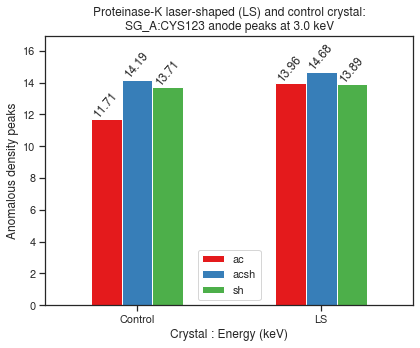

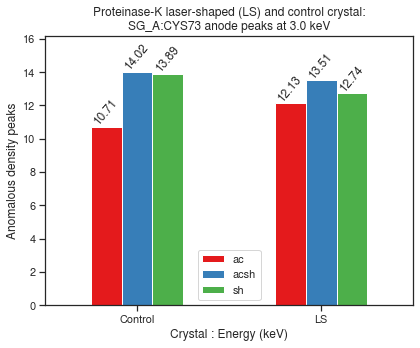

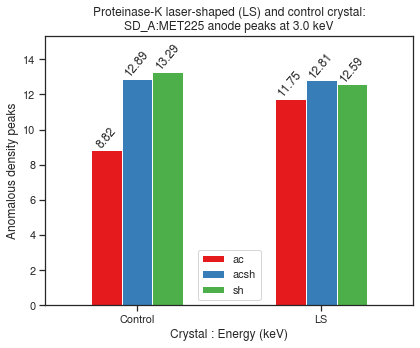

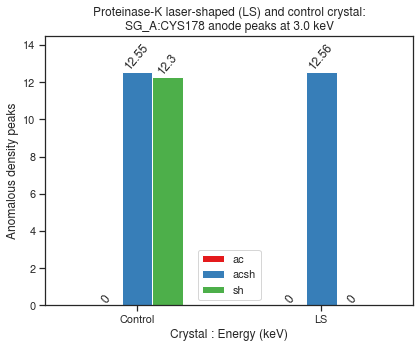

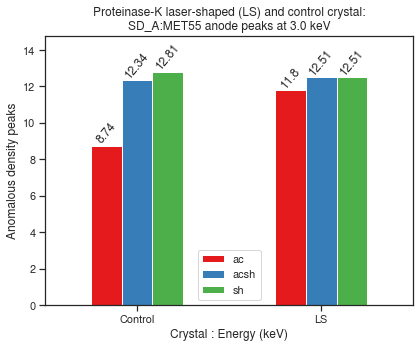

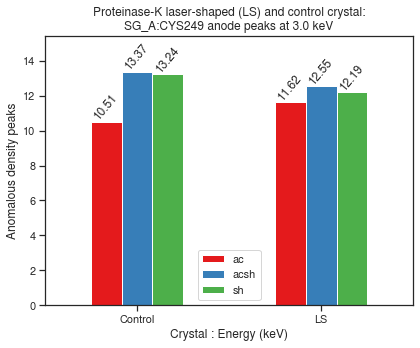

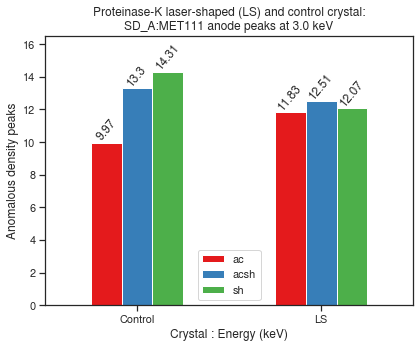